## **Fashion MNIST Image Classification**

**Benedictus Bayu Pramudhito**

In [46]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


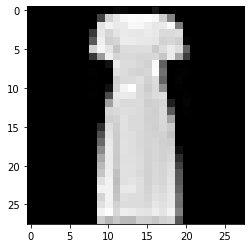

In [47]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

plt.imshow(X_train[50], cmap=plt.get_cmap('gray'))

In [48]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

**Feature Engineering**

In [49]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [50]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [51]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
print(y_train)

[9 0 0 ... 3 0 5]


In [54]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
#casting features
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD

**Multilayer Perceptron (Neural Network)**

In [13]:
base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) #Nilai 128 karena akan memakai 128 neuron
base_model.add(Dense(10, activation='softmax')) #Nilai 10 karena ada 10 label

opt = SGD(lr=0.01, momentum=0.9) #Optimizer Stochastic Gradient Descent, untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #Loss function
base_model.summary()

history = base_model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5256 - accuracy: 0.8143 - val_loss: 0.4834 - val_accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3981 - accuracy: 0.8567 - val_loss: 0.3966 - val_accuracy: 0.8567
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3597 - accurac

In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [16]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.525560,0.814317,0.483351,0.8263,0
1,0.398090,0.856733,0.396635,0.8567,1
2,0.359700,0.868850,0.388639,0.8608,2
3,0.336607,0.877117,0.367754,0.8661,3
4,0.319445,0.882783,0.384350,0.8586,4
5,0.304833,0.889017,0.353122,0.8738,5
6,0.292965,0.892583,0.347492,0.8736,6
7,0.282065,0.895650,0.340105,0.8822,7
8,0.273044,0.900450,0.359171,0.8705,8
9,0.262451,0.902050,0.354947,0.8749,9


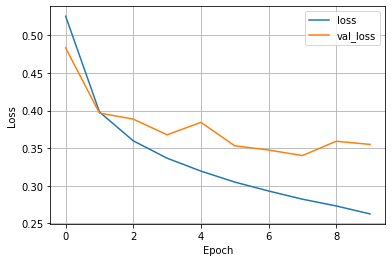

In [18]:
plot_loss(history) #epoch vs loss graph

Terlihat bahwa dari epoch ke-0 hingga ke-9, nilai loss dari model arsitektur multilayer perceptron terus mengalami penurunan sehingga nilai weightnya sudah sesuai untuk dilakukan klasifikasi

In [22]:
loss, accuracy = base_model.evaluate(X_test, y_test, verbose=2)

print('Test Accuracy:', round(accuracy, 3))
print('Test Loss:', round(loss, 3))

313/313 - 1s - loss: 0.3549 - accuracy: 0.8749
Test Accuracy: 0.875
Test Loss: 0.355


**Convolutional Neural Network**

In [36]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) #Convolution dengan 32 filter, masing-masing dengan kernel 3x3
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

#Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) #Memakai 100 neuron
model.add(Dense(10, activation='softmax')) #Terdapat 10 label pada dataset

opt = SGD(lr=0.01, momentum=0.9) #optimizer Stochastic Gradient Descent

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history_cnn = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4200 - accuracy: 0.8490 - val_loss: 

In [37]:
history_df_cnn = pd.DataFrame(history_cnn.history)
history_df_cnn['epoch'] = history_cnn.epoch
history_df_cnn

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.420046,0.848967,0.341864,0.8743,0
1,0.287289,0.894800,0.321936,0.8817,1
2,0.245036,0.910650,0.287098,0.8997,2
3,0.215921,0.919217,0.270120,0.9022,3
4,0.193592,0.928783,0.272755,0.9036,4
5,0.174329,0.935933,0.270533,0.9074,5
6,0.159370,0.940483,0.286267,0.9040,6
7,0.141705,0.947767,0.278694,0.9074,7
8,0.130240,0.951800,0.287915,0.9050,8
9,0.115897,0.957767,0.303475,0.9041,9


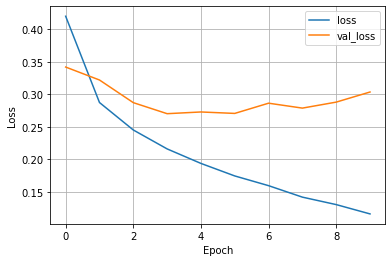

In [38]:
plot_loss(history_cnn)

Terlihat bahwa nilai val_loss pada epoch ke-3 hingga ke-7 sudah cukup stabil akan tetapi pada epoch ke-7 hingga ke-9 dia perlahan meningkat kembali

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

print('Test Accuracy:', round(accuracy, 3))
print('Test Loss:', round(loss, 3))

313/313 - 1s - loss: 0.3035 - accuracy: 0.9041
Test Accuracy: 0.904
Test Loss: 0.303


**Kesimpulan**

Dengan 10 epochs, arsitektur multilayer perceptron mendapatkan hasil akurasi sebesar 0.875 sedangkan arsitektur convolutional neural network mendapatkan hasil akurasi sebesar 0.904. Dengan begitu, arsitektur convolutional neural network mampu memberikan nilai akurasi yang lebih baik dibandingkan dengan arsitektur multilayer perceptron

**Convolutional Neural Network with Deeper Layer**

In [40]:
model = Sequential([Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                   MaxPooling2D((2,2)),
                   Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'),
                   MaxPooling2D((2,2)),
                   Flatten(),
                   Dense(100, activation='relu', kernel_initializer='he_uniform'),
                   Dense(10, activation='softmax')
])

In [41]:
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [42]:
model.summary()

history_cnn_1 = model.fit(
    X_train,
    y_train,
    batch_size=32,
    validation_data = (X_test, y_test),
    epochs=10
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [43]:
history_df_cnn1 = pd.DataFrame(history_cnn_1.history)
history_df_cnn1['epoch'] = history_cnn_1.epoch
history_df_cnn1

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.458214,0.835167,0.344131,0.8735,0
1,0.308817,0.884500,0.306159,0.8903,1
2,0.264595,0.902483,0.288381,0.8954,2
3,0.237028,0.911417,0.290003,0.8964,3
4,0.215320,0.920067,0.284432,0.9007,4
5,0.201207,0.923900,0.271299,0.9031,5
6,0.183928,0.930883,0.271656,0.9049,6
7,0.169700,0.936167,0.280389,0.9063,7
8,0.156580,0.941383,0.270708,0.9120,8
9,0.142535,0.946633,0.280877,0.9072,9


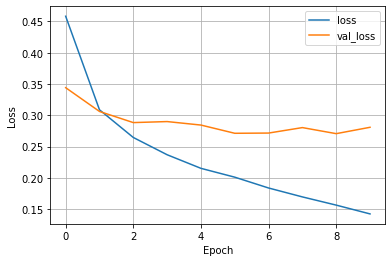

In [44]:
plot_loss(history_cnn_1)

Terlihat bahwa nilai val_loss sudah cenderung stabil pada epoch ke-2 hingga ke-9 yang berarti nilai weight sudah sesuai untuk dilakukan klasifikasi pada kasus ini

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

print('Test Accuracy:', round(accuracy, 3))
print('Test Loss:', round(loss, 3))

313/313 - 1s - loss: 0.2809 - accuracy: 0.9072
Test Accuracy: 0.907
Test Loss: 0.281


**Kesimpulan**

Dengan 10 epochs, arsitektur convolutional neural network dengan layer yang lebih dalam lagi (memakai 2 kali maxpooling dan juga 2 kali convolutional) mendapatkan hasil akurasi sebesar 0.907. Nilai ini sedikit lebih baik dibanding dengan arsitektur CNN dengan single layer